<a href="https://colab.research.google.com/github/nikhil2020/Movielens/blob/master/Movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#  Movielens Dataset Analysis


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
import os
os.chdir("/content/drive/My Drive/Datasets/MovieLens")

# Importing the libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

### Importing the movies.dat dataset

In [ ]:
dbmovies = pd.read_table('movies.dat',sep = '::',header = None)

In [ ]:
# Assigning the columns names to the movies dataset

In [ ]:
m_column = ['Id','Title','Genre']


In [ ]:
m_column

['Id', 'Title', 'Genre']

In [ ]:
dbmovies.columns = m_column

### Movies dataset after assigning the columns

In [ ]:
dbmovies.head()

,Id,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# unique count in the movies dataset
dbmovies.nunique()

Id       3883
Title    3883
Genre     301
dtype: int64

### Importing the rating dataset

In [ ]:
dbrating = pd.read_table("ratings.dat",sep = '::',header = None)

In [ ]:
r_col = ['Id','Review','Rating',"MobileNo"]

In [ ]:
dbrating.columns = r_col

#### Rating dataset 

In [ ]:
dbrating.head()

,Id,Review,Rating,MobileNo
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
# Number of unique element in the dataset columnwise
dbrating.nunique()

Id            6040
Review        3706
Rating           5
MobileNo    458455
dtype: int64

### Importing the users.dat dataset

In [ ]:
dbusers = pd.read_table("users.dat",sep = '::',header = None)

In [ ]:
u_col = ['Id','Gender','Age','X','occupation']

In [ ]:
dbusers.columns = u_col

#### Users dataset after assigning the column_name

In [ ]:
dbusers.head()

,Id,Gender,Age,X,occupation
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
dbusers.nunique()

Id            6040
Gender           2
Age              7
X               21
occupation    3439
dtype: int64

# Merging of two dataset movies and users

In [ ]:
t_mer = pd.merge(dbmovies,dbusers, how = 'inner',on = 'Id')

In [ ]:
t_mer.head()

,Id,Title,Genre,Gender,Age,X,occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067
1,2,Jumanji (1995),Adventure|Children's|Fantasy,M,56,16,70072
2,3,Grumpier Old Men (1995),Comedy|Romance,M,25,15,55117
3,4,Waiting to Exhale (1995),Comedy|Drama,M,45,7,02460
4,5,Father of the Bride Part II (1995),Comedy,M,25,20,55455


In [ ]:
# Checking for null values
t_mer.isnull().sum()

Id            0
Title         0
Genre         0
Gender        0
Age           0
X             0
occupation    0
dtype: int64

## The master dataset of all dataset i.e movies,users,rating

In [ ]:
master = pd.merge(t_mer,dbrating, how = 'inner',on = "Id")

### Final master dataset

In [ ]:
master.head()

,Id,Title,Genre,Gender,Age,X,occupation,Review,Rating,MobileNo
0,1,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067,1193,5,978300760
1,1,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067,661,3,978302109
2,1,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067,914,3,978301968
3,1,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067,3408,4,978300275
4,1,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067,2355,5,978824291


In [ ]:
# shape of the master dataset
master.shape

(645833, 10)

# Data Understaing and Exploration


### User Age Distribution
#####  >>>The countplot show the age distribution w.r.t to Gender which show that age = 25 male is interested in watching movies and gives review with respective to the movies.

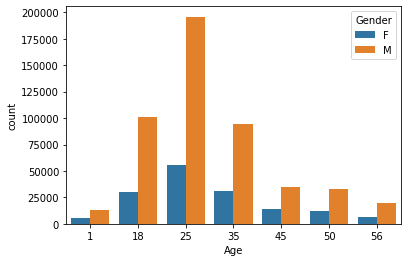

In [ ]:
ax = sns.countplot('Age',data = master,hue = 'Gender')


### User rating of the movie “Toy Story”


##### The User gives Rating to the Movies Toy Story in the year 1995 

In [ ]:
User_rating=master[master.Title == 'Toy Story (1995)'][['Title','Rating']]

In [ ]:
User_rating.head()

,Title,Rating
0,Toy Story (1995),5
1,Toy Story (1995),3
2,Toy Story (1995),3
3,Toy Story (1995),4
4,Toy Story (1995),5


### Top 25 movies by viewership rating


##### The top 25 most review by the user movies are following

In [ ]:
x =master.groupby(['Title']).sum()

In [ ]:
y = x.sort_values(by = ['Review'],ascending = False).head(25)

In [ ]:
Viewship = pd.DataFrame(y.Review)

In [ ]:
Viewship.head(25)

,Review
Title,
Sliding Doors (1998),3484153
Hamlet (1948),3220078
1-900 (1994),3014306
"Shooter, The (1995)",2950602
Small Time Crooks (2000),2549095
Seventh Heaven (Le Septi�me ciel) (1997),2522136
Blue Chips (1994),2479950
Waiting for Guffman (1996),2477592
"Five Wives, Three Secretaries and Me (1998)",2444231


### Find the ratings for all the movies reviewed by for a particular user of user id = 2696


In [ ]:
master[master.Id == 2696][['Title','Rating']]

,Title,Rating
430638,"Dinner Game, The (Le D�ner de cons) (1998)",4
430639,"Dinner Game, The (Le D�ner de cons) (1998)",2
430640,"Dinner Game, The (Le D�ner de cons) (1998)",4
430641,"Dinner Game, The (Le D�ner de cons) (1998)",4
430642,"Dinner Game, The (Le D�ner de cons) (1998)",2
430643,"Dinner Game, The (Le D�ner de cons) (1998)",4
430644,"Dinner Game, The (Le D�ner de cons) (1998)",4
430645,"Dinner Game, The (Le D�ner de cons) (1998)",4
430646,"Dinner Game, The (Le D�ner de cons) (1998)",5
430647,"Dinner Game, The (Le D�ner de cons) (1998)",2


### Feature Engineering

##### Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)


In [ ]:
x = master['Genre'].apply(lambda x : x.split('|')[0]).unique()
x

array(['Animation', 'Adventure', 'Comedy', 'Action', 'Drama', 'Thriller',
       'Crime', 'Romance', "Children's", 'Documentary', 'Sci-Fi',
       'Horror', 'Western', 'Mystery', 'Film-Noir', 'War', 'Fantasy',
       'Musical'], dtype=object)

### Creating a new column name genre 

In [ ]:
master['genre'] = master['Genre'].apply(lambda x : x.split('|')[0])

In [ ]:
master.shape

(645833, 11)

In [ ]:
master.head()

,Id,Title,Genre,Gender,Age,X,occupation,Review,Rating,MobileNo,genre
0,1,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067,1193,5,978300760,Animation
1,1,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067,661,3,978302109,Animation
2,1,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067,914,3,978301968,Animation
3,1,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067,3408,4,978300275,Animation
4,1,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067,2355,5,978824291,Animation


##### Create a separate column for each genre category with a one hot encoding ( 1 and 0) whether or not the movie belong to that genre. 


In [ ]:
x = master.values

### Importing LAbelEncoder Class with onehotencoder

In [ ]:

from sklearn.preprocessing import LabelEncoder , OneHotEncoder
## Creating an object for LabelEncoder
labelencoder_iv = LabelEncoder()

x[:,10]=labelencoder_iv.fit_transform(x[:,10])

onehotencoder = OneHotEncoder(categorical_features='all')
iv= onehotencoder.fit_transform(x).toarray()


TypeError: ignored

In [ ]:
iv.shape

NameError: ignored

In [ ]:
iv = pd.DataFrame(iv)

NameError: ignored

In [ ]:
iv.head()

NameError: ignored

# Linear Regression Model

### Master dataset with sub dataset of Movies,Users and Rating
#### head() to view the top 5 row of the master dataset

In [ ]:
master.head()

,Id,Title,Genre,Gender,Age,X,occupation,Review,Rating,MobileNo,genre
0,1,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067,1193,5,978300760,Animation
1,1,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067,661,3,978302109,Animation
2,1,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067,914,3,978301968,Animation
3,1,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067,3408,4,978300275,Animation
4,1,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067,2355,5,978824291,Animation


#### Droping the columns which is less significane to the dataset

In [ ]:
master.drop(labels = ['Title','Genre','MobileNo','occupation','X'],axis =1,inplace = True)

#### Creating the dummies of Gender and genre in the dataset

In [ ]:
dummy_cities=pd.get_dummies(master['Gender'])
master=pd.concat([master,dummy_cities],axis=1)

In [ ]:
dummy_cities=pd.get_dummies(master['genre'])
master=pd.concat([master,dummy_cities],axis=1)

In [ ]:
master.shape

(645833, 26)

#### After creating the dummies droping the orginal column from the dataset

In [ ]:
master.drop(labels = ['genre'],axis =1,inplace = True)

In [ ]:
master.drop(labels = ['Gender'],axis =1,inplace = True)

In [ ]:
# master.drop(labels = ['Age'],axis =1,inplace = True)

In [ ]:
master.Id.nunique()

3883

In [ ]:
master.shape

(645833, 24)

#### Master dataset view after creating the dummies

In [ ]:
master.head()

,Id,Age,Review,Rating,F,M,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,1193,5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,661,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,914,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,3408,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,2355,5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Dividing the Dataset into independent and dependent variables

In [ ]:
dv = master[['Review']]

In [ ]:
iv = master[['Id', 'Rating', 'F', 'M', 'Action', 'Adventure',
       'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western']]

### Splitting the master dataset into training and testing with ratio of 80:20 at random sample 0

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iv,dv,test_size = 0.20,random_state = 0)

#### After splitting the dataset shape of the training and testing

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(516666, 22)
(129167, 22)
(516666, 1)
(129167, 1)


In [ ]:
X_train.head()

,Id,Rating,F,M,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
546426,3419,4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
59805,408,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
245916,1509,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
575514,3576,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
293692,1797,5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = X_train.values

In [ ]:
X_test  = X_test.values

In [ ]:
y_train = y_train.values

# Feature Scaling

In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,[0,1]] = sc.fit_transform(X_train[:,[0,1]])
X_test[:,[0,1]] = sc.fit_transform(X_test[:,[0,1]])

y_train[:,[0]] = sc.fit_transform(y_train[:,[0]])

In [ ]:
X= pd.DataFrame(X_train)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,-1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# Linear Regression Model 

In [ ]:
from sklearn.linear_model import LinearRegression
x = LinearRegression()
model = x.fit(X_train,y_train)

In [ ]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the values on the independent test dataset i.e X_test

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = pd.DataFrame(y_pred)

## Interpretation of the Model 
#### R Square of the model
#### The coefficient of the independent variables
#### The intercept of the model 

In [ ]:
print("The R Square of the model is " ,model.score(X_train,y_train))
print("The Coefficient if Regression is/are" ,model.coef_)
print("The Intercept of the model is " ,model.intercept_)



The R Square of the model is  0.0005877138013623551
The Coefficient if Regression is/are [[-1.96075115e-03 -1.38390910e-02  2.22905960e+12  2.22905960e+12
   2.95771457e+11  2.95771457e+11  2.95771457e+11  2.95771457e+11
   2.95771457e+11  2.95771457e+11  2.95771457e+11  2.95771457e+11
   2.95771457e+11  2.95771457e+11  2.95771457e+11  2.95771457e+11
   2.95771457e+11  2.95771457e+11  2.95771457e+11  2.95771457e+11
   2.95771457e+11  2.95771457e+11]]
The Intercept of the model is  [-2.52483105e+12]


### Root square mean error 

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
# Root squared mean error
rms

2178.5790346739345

# Graph for linear regression model 

In [ ]:
y_pred.columns = ['prediction']
print(y_pred.head())
print(y_pred.shape)

   prediction
0    0.009766
1    0.023438
2    0.001465
3   -0.008301
4    0.032715
(129167, 1)


In [ ]:
df = pd.DataFrame()

In [ ]:
y_pred.shape

(129167, 1)

In [ ]:
y_pred.head()

,prediction
0,0.009766
1,0.023438
2,0.001465
3,-0.008301
4,0.032715


In [ ]:
y_test = pd.DataFrame(y_test)
y_test.head()

,Review
245690,3000
158780,2333
625481,919
466377,3176
590829,123


In [ ]:
y_test.columns = ['Review']

In [ ]:
y_test = y_test.reset_index()
y_test.head()

,index,Review
0,245690,3000
1,158780,2333
2,625481,919
3,466377,3176
4,590829,123


In [ ]:
print(y_test.shape)
print(y_test.head())


(129167, 2)
    index  Review
0  245690    3000
1  158780    2333
2  625481     919
3  466377    3176
4  590829     123


In [ ]:
df = pd.concat([y_test,y_pred],axis =1)
df.head()


,index,Review,prediction
0,245690,3000,0.009766
1,158780,2333,0.023438
2,625481,919,0.001465
3,466377,3176,-0.008301
4,590829,123,0.032715


In [ ]:
df = df.drop(['index'],axis =1)


In [ ]:
df.head()

,Review,prediction
0,3000,0.009766
1,2333,0.023438
2,919,0.001465
3,3176,-0.008301
4,123,0.032715


## LInear Regression Plot

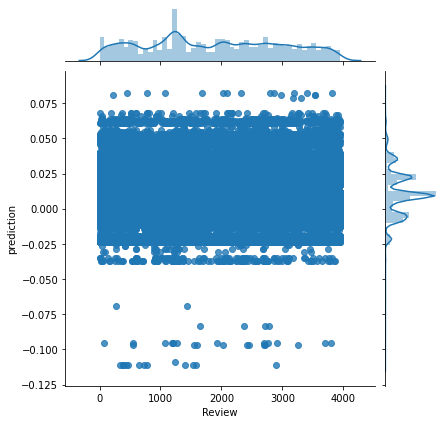

In [ ]:
sns.jointplot('Review','prediction',data = df,kind ='reg')
